# K-Means Clustering Example (2D, K=2)
This notebook demonstrates a simple example of K-Means clustering with 5 data points in 2D space.
We compute distances, assignments, update centroids, and calculate the objective function \( J \).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 2D Data Points
X = np.array([
    [1, 2],  # A
    [1, 4],  # B
    [1, 0],  # C
    [10, 2], # D
    [10, 4]  # E
])

# Initial centroids
mu1 = np.array([1, 2])  # Chosen from A
mu2 = np.array([10, 2]) # Chosen from D

In [2]:
# Step 1: Assign points to the nearest centroid
def euclidean_squared(a, b):
    return np.sum((a - b)**2)

assignments = []
for x in X:
    d1 = euclidean_squared(x, mu1)
    d2 = euclidean_squared(x, mu2)
    assignments.append(0 if d1 < d2 else 1)
assignments = np.array(assignments)
print("Initial Assignments:", assignments)

Initial Assignments: [0 0 0 1 1]


In [3]:
# Step 2: Update centroids based on assignments
mu1_new = X[assignments == 0].mean(axis=0)
mu2_new = X[assignments == 1].mean(axis=0)
print("Updated mu1:", mu1_new)
print("Updated mu2:", mu2_new)

Updated mu1: [1. 2.]
Updated mu2: [10.  3.]


In [4]:
# Step 3: Compute cost function J
J = 0
mu = [mu1_new, mu2_new]
for i in range(len(X)):
    cluster = assignments[i]
    J += euclidean_squared(X[i], mu[cluster])
print("Final Objective J =", J)

Final Objective J = 10.0


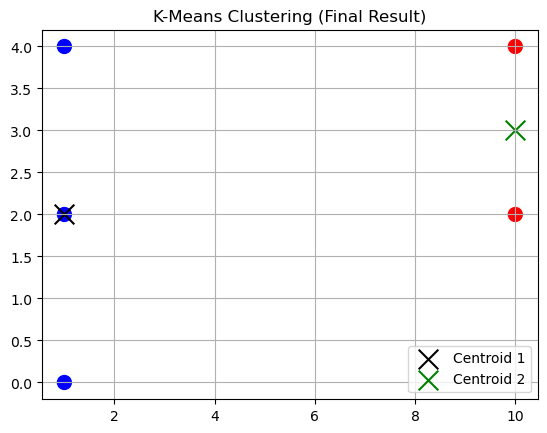

In [5]:
# Optional: Plot data and cluster centers
colors = ['blue' if a == 0 else 'red' for a in assignments]
plt.scatter(X[:, 0], X[:, 1], c=colors, s=100)
plt.scatter(mu1_new[0], mu1_new[1], c='black', marker='x', s=200, label='Centroid 1')
plt.scatter(mu2_new[0], mu2_new[1], c='green', marker='x', s=200, label='Centroid 2')
plt.title("K-Means Clustering (Final Result)")
plt.legend()
plt.grid(True)
plt.show()